# Question 1


We need to use the following update equation which was derived in the project instructions. 


$$e^{\Omega(\omega)\theta}=cos(\|\omega\|\theta)\bold{I_4} + sin(\|\omega\|\theta)\frac{\Omega(\omega)} {\|\omega\|}$$


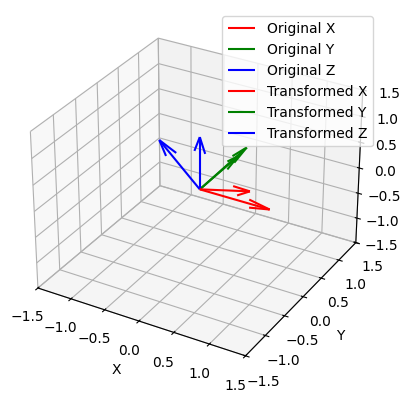

Correct answer:  0.9571 <<  0.1036, -0.2500, -0.1036 >>
Our Answer:      0.9571 <<  0.1036, -0.2500, -0.1036 >>


In [3]:
import spatialmath as sm
from spatialmath.base import *
import numpy as np
import matplotlib.pyplot as plt

from time import sleep


def visualize_orientation_animation(quaternion, deltaT):
    # Clear the axes to redraw the updated frame.
    ax.clear()
    
    # Define the original coordinate frame axes.
    origin = np.array([0, 0, 0])
    x_axis = np.array([1, 0, 0])
    y_axis = np.array([0, 1, 0])
    z_axis = np.array([0, 0, 1])
    
    # Plot the original coordinate frame.
    ax.quiver(*origin, *x_axis, color='r', label='Original X')
    ax.quiver(*origin, *y_axis, color='g', label='Original Y')
    ax.quiver(*origin, *z_axis, color='b', label='Original Z')
    
    # Get the rotation matrix from the updated quaternion.
    R = quaternion.R
    
    # Compute the transformed axes.
    transformed_x = R @ x_axis
    transformed_y = R @ y_axis
    transformed_z = R @ z_axis
    
    # Plot the transformed coordinate frame.
    ax.quiver(*origin, *transformed_x, color='r', label='Transformed X')
    ax.quiver(*origin, *transformed_y, color='g', label='Transformed Y')
    ax.quiver(*origin, *transformed_z, color='b', label='Transformed Z')
    
    # Set the axis limits and labels.
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    
    # Draw the updated plot and pause briefly.
    plt.draw()
    plt.pause(deltaT) 



def updateQuaternion(original: sm.UnitQuaternion, bodyAngularVelocity: np.ndarray, deltaT: float) -> sm.UnitQuaternion:
    """
    Update the quaternion representing the orientation of a body given its angular velocity.

    This function computes the change in the body's orientation based on the given body angular velocity and 
    the time step (deltaT), and returns the updated orientation as a quaternion.

    Parameters:
    - original (sm.UnitQuaternion): The original quaternion representing the body's orientation.
    - bodyAngularVelocity (np.ndarray): The angular velocity of the body in radians per second, represented as a 3D column vector.
    - deltaT (float): The time step over which the orientation change occurs, in seconds.

    Returns:
    - sm.UnitQuaternion: The updated quaternion representing the body's new orientation.

    """
    Omega = np.vstack((np.hstack((np.array([[0]]), -bodyAngularVelocity.T)), np.hstack((bodyAngularVelocity, -skew(bodyAngularVelocity)))))
    normOmega = np.linalg.norm(bodyAngularVelocity)
    theta = .5 * deltaT
    exponent = np.cos(normOmega * theta) * np.eye(4) + np.sin(normOmega * theta) * Omega / normOmega

    return exponent @ np.array(original.data).reshape(4, 1)

from q1createinputs import generate_body_angular_velocities
from mpl_toolkits.mplot3d import Axes3D
deltaT = .01
quaternion = sm.UnitQuaternion()
input_data = generate_body_angular_velocities(deltaT)

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for time, wx, wy, wz in input_data:   
    quaternion = updateQuaternion(quaternion, np.array([wx, wy, wz]).reshape(3,1), deltaT)
    # Run this outside of jupyter notebook to see visualization. 
    # final_quaternion = sm.UnitQuaternion()
    # final_quaternion.data = [np.array(quaternion).reshape(1,4)]
    # visualize_orientation_animation(final_quaternion, deltaT)


one = sm.SO3.Rx(np.pi/4)
two = sm.SO3.Rz(np.pi/4)
three = sm.SO3.Rx(-np.pi/4)
four = sm.SO3.Rz(-np.pi/4)


final_quaternion = sm.UnitQuaternion()
correct_quaternion = sm.UnitQuaternion()
correct_quaternion.data = [np.array(r2q(np.array(one @ two @ three @ four))).reshape(1,4)]

final_quaternion.data = [np.array(quaternion).reshape(1,4)]
visualize_orientation_animation(final_quaternion, deltaT)
print("Correct answer: " + str(correct_quaternion))
print("Our Answer:     " + str(final_quaternion))


